In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install plotly
import plotly.express as px
import plotly.graph_objects as go

In [72]:
may =  pd.read_csv(r"C:\Users\DiDi\Documents\analysis chihuahua\may.csv")
april =  pd.read_csv(r"C:\Users\DiDi\Documents\analysis chihuahua\april.csv")

# 1. Analysis by shop type label

In [153]:
drop= [' city_id',' shop_id', ' bd_user_name', ' week_date',' city_name',' shop_name',' shop_layer_level' ]

april_clean = april.drop(drop, axis = 1)
april_group_avg = april_clean.groupby(by = " shop_type_label").mean()
#april_group.head()

may_clean = may.drop(drop, axis = 1)
may_group_avg = may_clean.groupby(by = " shop_type_label").mean()
#may_group.head()

In [101]:
#Resumen
april_group_avg.head()

,avg_didi_orig_price,avg_ue_price,diff_in_price_pesos,diff_in_price_percent,pct_80_diff_in_pesos,pct_80_min_diff_in_price_pesos_,didi_higher_ue_match_dishes,didi_ue_match_dishes,orders_cnt,price_adjustment_index
shop_type_label,,,,,,,,,,
CKA,132.617200,119.809800,12.807333,12.835000,15.173333,7.673000,7.300000,31.520000,17.020000,1.413273
KA,136.222308,123.943846,12.278462,10.837692,15.100000,6.653846,8.576923,51.269231,17.461538,0.830494
NORMAL,108.500508,95.048475,13.451737,15.519237,17.089831,7.299873,7.016949,22.750000,10.584746,1.695398


In [147]:
may_group_avg.head()

,avg_didi_orig_price,avg_ue_price,diff_in_price_pesos,diff_in_price_percent,pct_80_diff_in_pesos,pct_80_min_diff_in_price_pesos_,didi_higher_ue_match_dishes,didi_ue_match_dishes,orders_cnt,price_adjustment_index
shop_type_label,,,,,,,,,,
CKA,131.702266,119.027578,12.674297,12.286875,15.034375,7.723047,7.539062,26.429688,28.640625,2.869540
KA,182.940769,170.683846,12.255000,6.970385,13.907692,8.923077,23.730769,37.730769,26.846154,0.976965
NORMAL,110.218019,97.317923,12.899758,14.946618,16.140097,7.014251,6.550725,18.019324,15.898551,2.724652


In [186]:
# Visualizar la relación entre variables usando parcelas
plt.figure(figsize = (15, 15))

#the scatter matrix is all for may, even if it says april
april_group_avg2 = may_group_avg[[' diff_in_price_percent',' didi_higher_ue_match_dishes', ' orders_cnt']]
fig = px.scatter_matrix(april_group_avg2,
    dimensions = april_group_avg2, color = april_group_avg2.index)

fig.update_layout(
    title = 'May Price Parity Data per Category ',
    width = 800,
    height = 800,
)
fig.show()


<Figure size 1080x1080 with 0 Axes>

# 2. Simple General Monthly Analysis of ' diff_in_price_percent',' didi_higher_ue_match_dishes', ' orders_cnt' averages

<AxesSubplot:title={'center':'April'}, ylabel='Averages'>

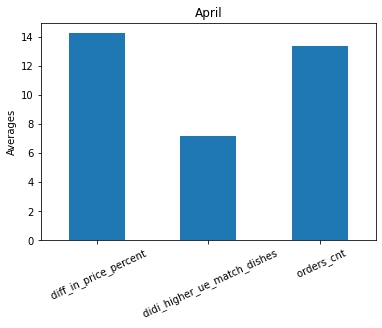

In [168]:
#al hacerlo mean() , hace una tupla
april_clean_avg = april_clean[[' diff_in_price_percent',' didi_higher_ue_match_dishes', ' orders_cnt']].mean()


april_avg_main = april_clean_avg
axA = april_avg_main.plot.bar(x='Metrics', y='Averages', rot=25)
plt.title('April')
plt.ylabel('Averages')
display(axA)

<AxesSubplot:title={'center':'May'}, ylabel='Averages'>

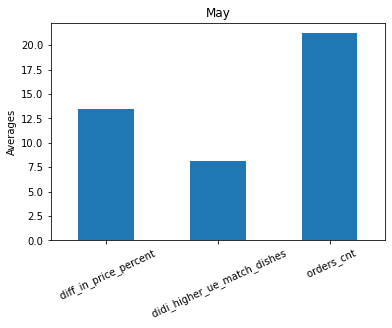

In [170]:
#al hacerlo mean() , hace una tupla
may_clean_avg = may_clean[[' diff_in_price_percent',' didi_higher_ue_match_dishes', ' orders_cnt']].mean()


may_avg_main = may_clean_avg
axM = may_avg_main.plot.bar(x='Metrics', y='Averages', rot=25)
plt.title('May')
plt.ylabel('Averages')
display(axM)

# 3. Analysis by restaurant category (averages)

In [117]:
dropp = [' city_id',' shop_id', ' bd_user_name', ' week_date',' city_name',' shop_name',' shop_layer_level' ]

april_group_avg_cat = april.drop(dropp, axis = 1)
april_group_avg_cat = april_group_avg_cat.groupby(by = " shop_category").mean().sort_values(' didi_higher_ue_match_dishes' , ascending=False)
#april_group.head()

may_group_avg_cat = may.drop(dropp, axis = 1)
may_group_avg_cat = may_group_avg_cat.groupby(by = " shop_category").mean().sort_values(' didi_higher_ue_match_dishes' , ascending=False)

# 3.a Monthly average by restaurants category, sorted by 	didi_higher_ue_match_dishes

-In april we can observe that in the the category, "TORTAS", with the higher didi_higher_ue_match_dishes average is also the one with the higher average orders_cnt

-In may we can observe that the top 4/5 best selling categories "Asian", "Tortas", "Bakery", "Sushi" (based on the orders_cnt) are also among the top 7 categories with the didi_higher_ue_match_dishes average

-

In [118]:
april_group_avg_cat.head(22) #April

,avg_didi_orig_price,avg_ue_price,diff_in_price_pesos,diff_in_price_percent,pct_80_diff_in_pesos,pct_80_min_diff_in_price_pesos_,didi_higher_ue_match_dishes,didi_ue_match_dishes,orders_cnt,price_adjustment_index
shop_category,,,,,,,,,,
Tortas,84.463750,73.026250,11.436250,15.745000,15.550000,4.250000,17.750000,24.625000,62.000000,7.462602
Noodles And Pastas,186.920000,154.410000,32.510000,21.050000,34.800000,21.000000,17.000000,17.000000,0.000000,0.000000
Asian,110.831667,99.221667,11.610833,10.845000,12.800000,8.683333,13.333333,44.666667,55.833333,2.839228
Seafood,151.005172,135.085862,15.918621,12.006897,20.903448,7.532759,10.724138,33.344828,2.586207,0.141638
Healthy,171.898235,153.773529,18.121765,12.959412,22.494118,9.994118,9.117647,32.000000,1.823529,0.216107
Meat,143.168750,126.650833,16.518333,16.165833,21.150000,7.581250,9.000000,29.041667,2.958333,0.752703
Dessert,221.166875,203.456875,17.710000,10.437500,19.887500,14.812500,8.375000,22.437500,5.000000,0.467638
Coffee,77.930769,69.671538,8.257692,12.207692,11.307692,3.307692,8.153846,33.230769,4.846154,0.190523
Sushi,111.867407,101.964074,9.904444,10.676296,13.081481,5.051852,7.407407,41.444444,31.740741,2.722628


In [119]:
may_group_avg_cat.head(22)

,avg_didi_orig_price,avg_ue_price,diff_in_price_pesos,diff_in_price_percent,pct_80_diff_in_pesos,pct_80_min_diff_in_price_pesos_,didi_higher_ue_match_dishes,didi_ue_match_dishes,orders_cnt,price_adjustment_index
shop_category,,,,,,,,,,
Sandwiches,96.536429,87.688571,8.844286,13.275000,8.785714,7.428571,33.928571,64.357143,28.714286,0.820185
Bakery,90.050000,80.900000,9.140000,11.300000,13.000000,1.000000,21.000000,21.000000,52.000000,5.570403
Asian,98.240000,89.318750,8.917500,8.976250,10.850000,3.025000,16.250000,51.125000,118.500000,13.686062
Tortas,89.255714,77.515714,11.740000,15.140000,15.657143,4.142857,15.142857,19.000000,107.142857,10.366319
Seafood,149.365455,134.850909,14.514545,10.489545,19.636364,5.870455,11.136364,28.727273,8.272727,0.679889
Healthy,108.721429,94.724286,13.996429,15.220714,16.457143,8.928571,9.928571,26.214286,0.857143,0.116865
Sushi,118.900370,108.141111,10.759259,10.857778,12.992593,6.422222,9.666667,31.962963,47.851852,4.796080
Meat,163.643500,147.921500,15.722000,13.850000,20.000000,6.647500,9.600000,20.500000,6.700000,0.934138
Dessert,237.282667,215.418000,21.864667,10.911333,23.200000,19.066667,9.333333,17.266667,8.266667,0.735393


# 3.b Heatmap between variables and restaurants category

<AxesSubplot:title={'center':'APRIL Heatmap between variables and restaurants category'}, ylabel=' shop_category'>

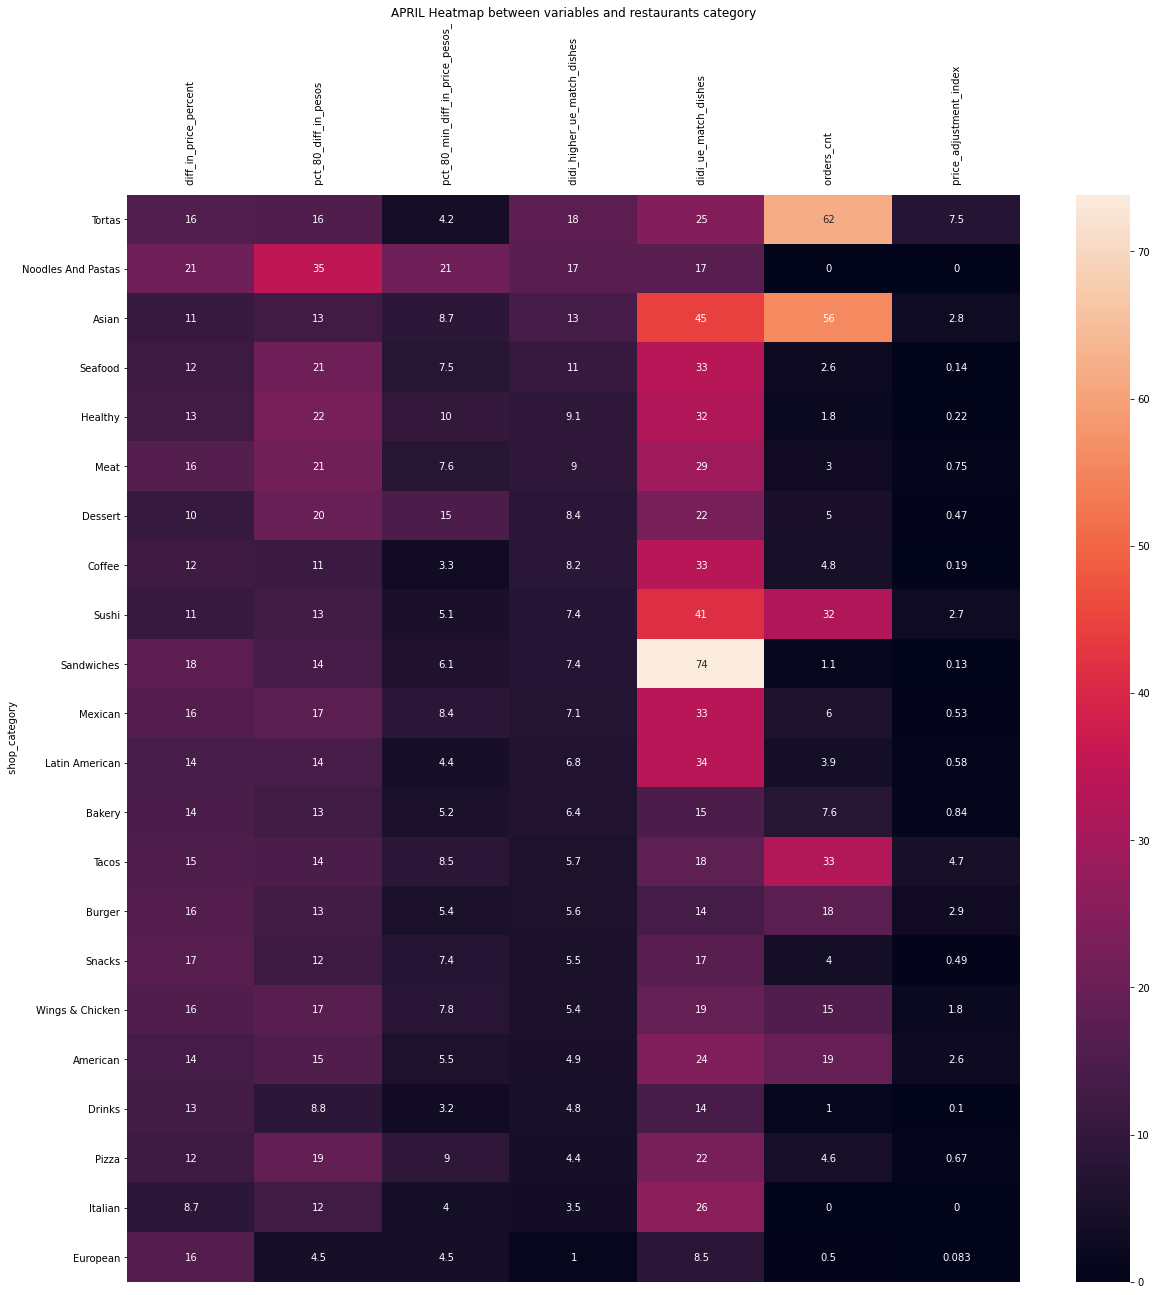

In [175]:
#april
dropp = [' avg_didi_orig_price',	' avg_ue_price',	' diff_in_price_pesos' ]

april_group_avg_cat2 = april_group_avg_cat.drop(dropp, axis = 1)
plt.figure(figsize = (20, 20))
plt.title('APRIL Heatmap between variables and restaurants category')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)
#plt.xticks(rotation=25)


sns.heatmap(april_group_avg_cat2, annot = True, cbar = True)


<AxesSubplot:title={'center':'MAY Heatmap between variables and restaurants category'}, ylabel=' shop_category'>

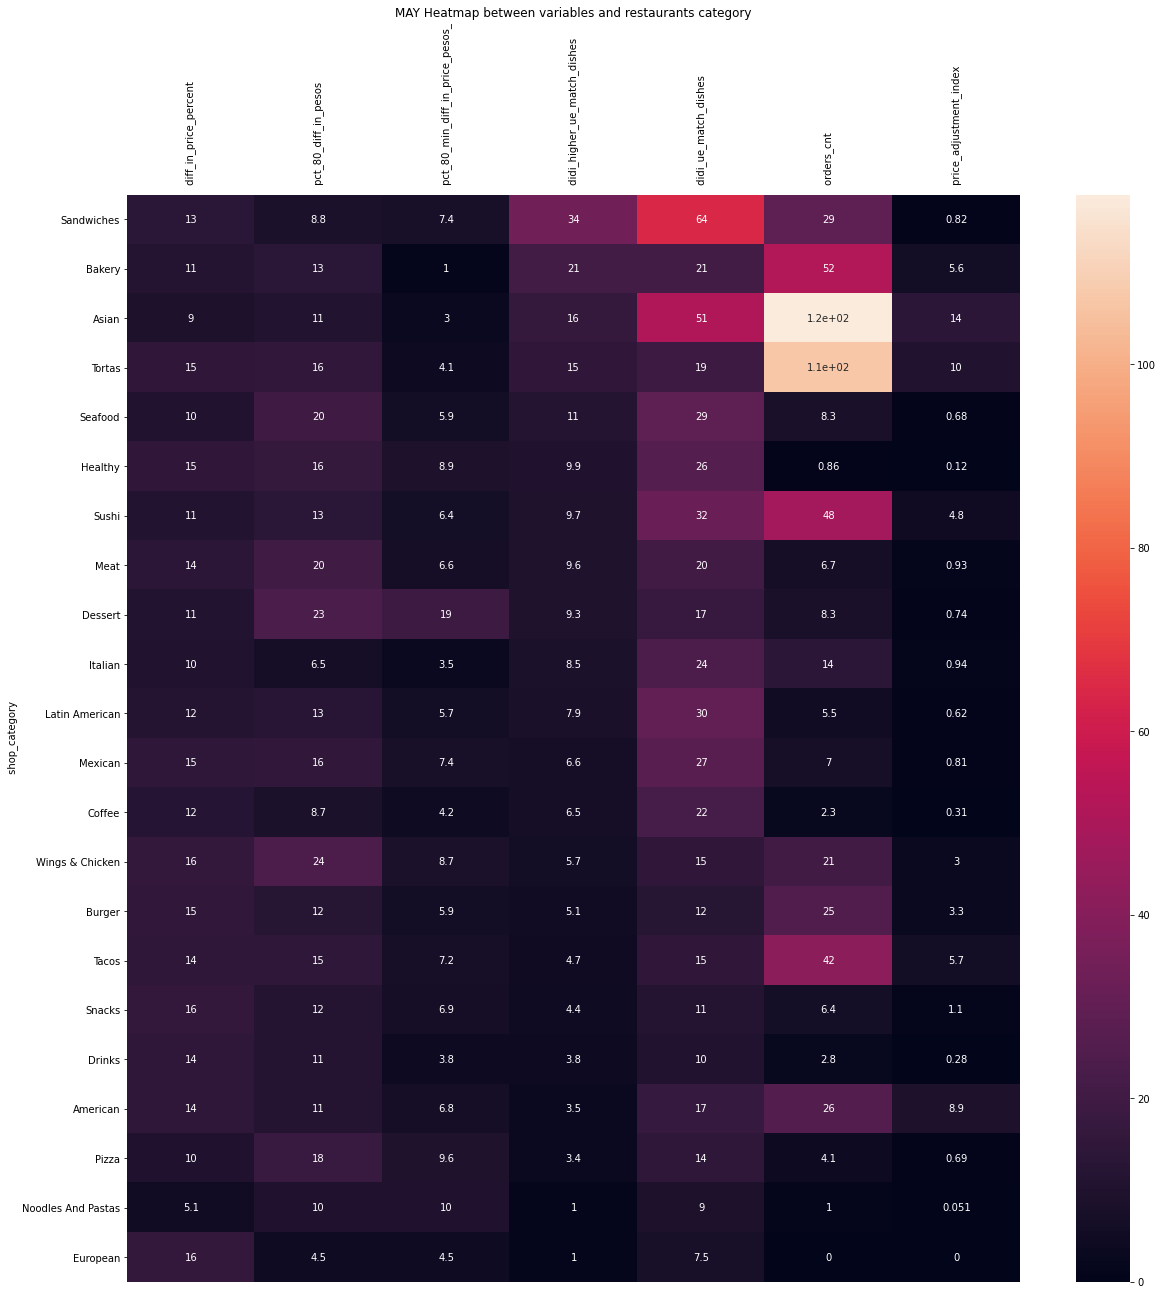

In [176]:
#may
dropp = [' avg_didi_orig_price',	' avg_ue_price',	' diff_in_price_pesos' ]

may_group_avg_cat2 = may_group_avg_cat.drop(dropp, axis = 1)
plt.figure(figsize = (20, 20))
plt.title('MAY Heatmap between variables and restaurants category')
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

sns.heatmap(may_group_avg_cat2, annot = True, cbar = True)

# 3.c Heatmaps between variables

We can observe that in both months, orders_cnt and didi_higher_ue_match_dishes, have a moderate relation of 0.45 approx.

----------April

<AxesSubplot:>

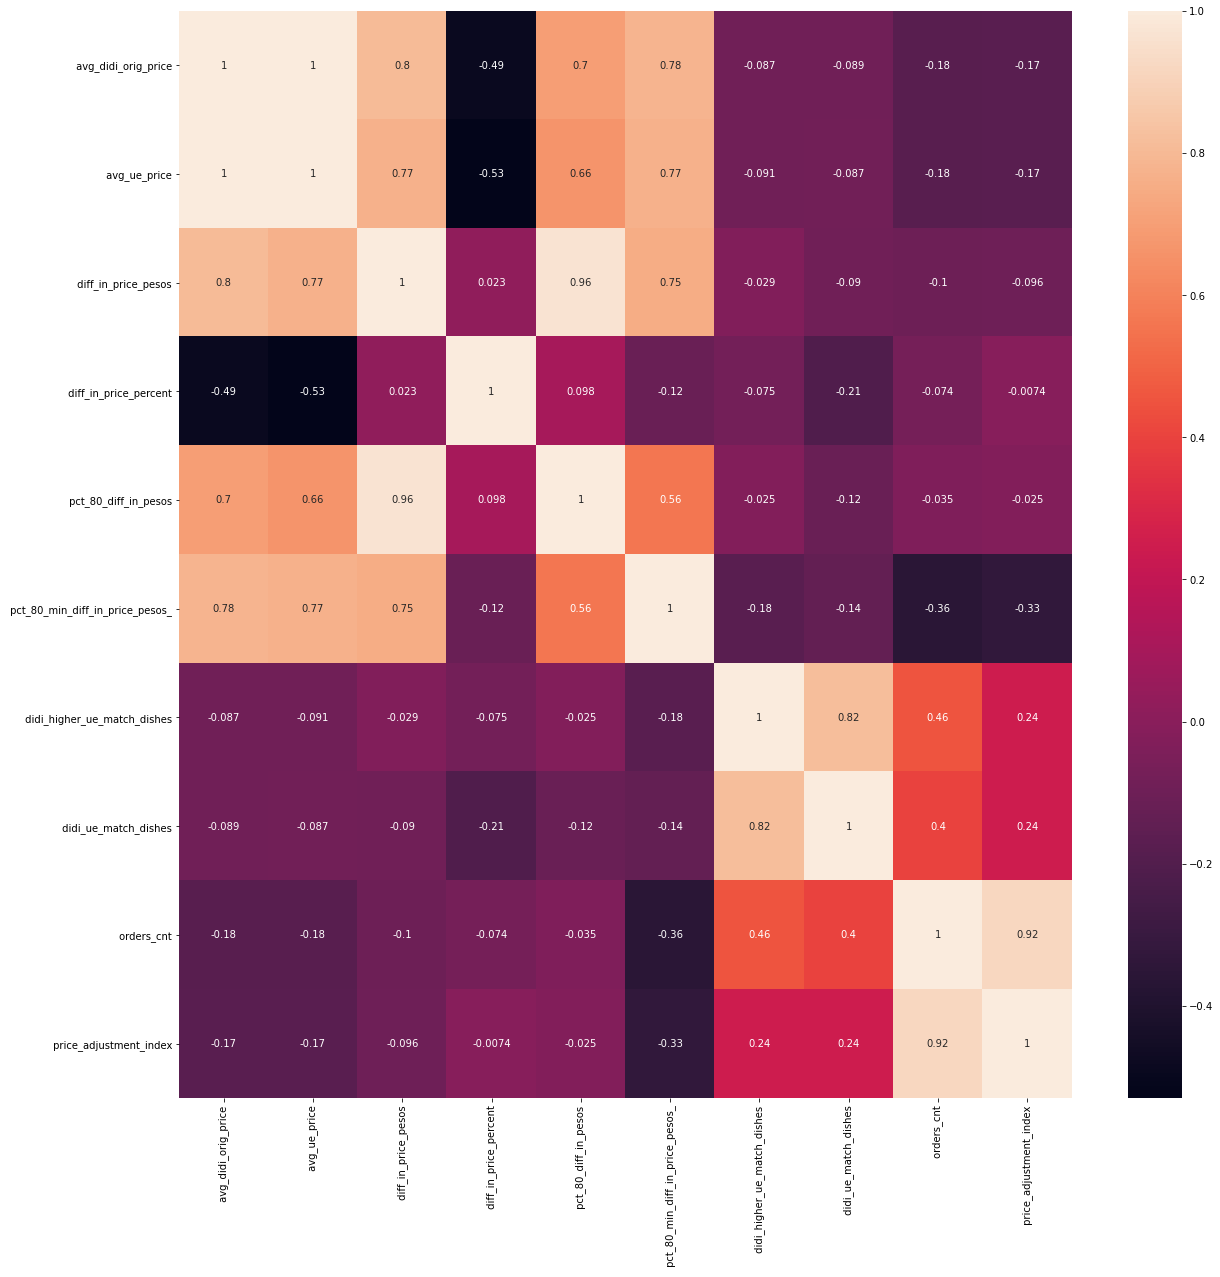

In [180]:
#may
plt.figure(figsize = (20, 20))
corr_matrix = may_group_avg_cat.iloc[:, :10].corr()
sns.heatmap(corr_matrix, annot = True, cbar = True)


May

<AxesSubplot:>

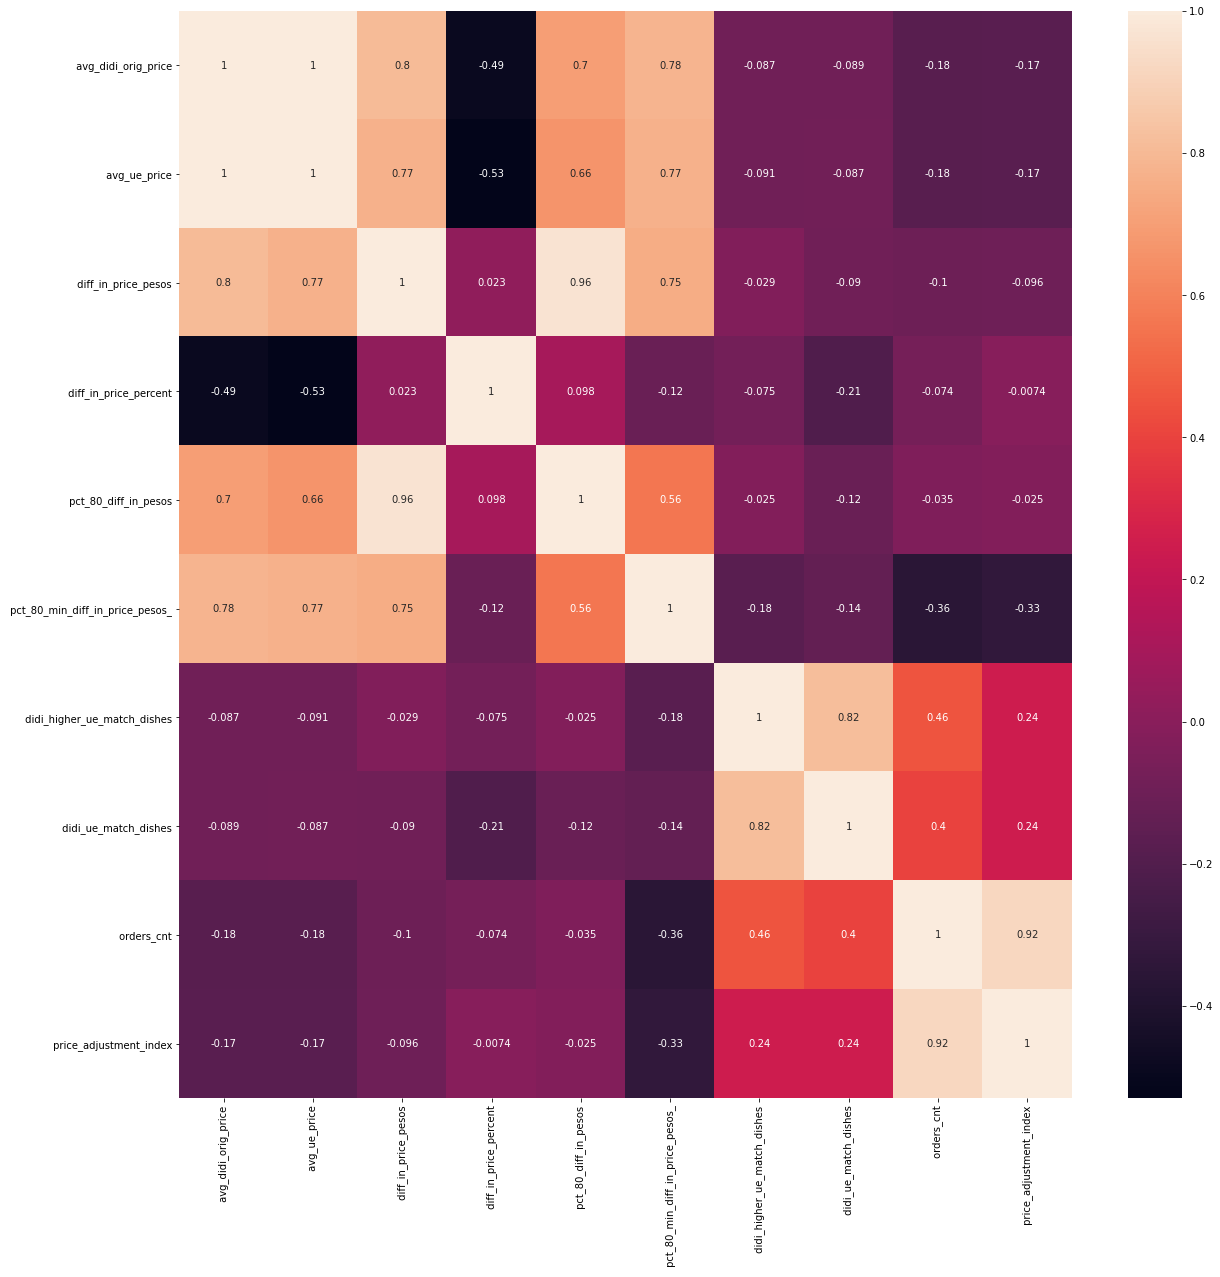

In [178]:

#may
plt.figure(figsize = (20, 20))
corr_matrix = may_group_avg_cat.iloc[:, :10].corr()
sns.heatmap(corr_matrix, annot = True, cbar = True)

In [133]:
#Model to try analyse relation between ' diff_in_price_percent' and ' orders_cnt', but result wasn't that clear. Will be checked later
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X = may[' diff_in_price_percent'].values
y = may[' orders_cnt'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 42)

X_train_sm = sm.add_constant(X_train)


# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.01808
Date:                Tue, 18 May 2021   Prob (F-statistic):              0.893
Time:                        17:38:36   Log-Likelihood:                -1467.3
No. Observations:                 252   AIC:                             2939.
Df Residuals:                     250   BIC:                             2946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0866      8.180      2.945      0.004       7.976      40.197
x1            -0.0624      0.464     -0.134      0.893      -0.976       0.851
==============================================================================
Omnibus:                      359.847   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34249.051
Skew:                           6.801   Prob(JB):                         0.00
Kurtosis:                      58.469   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""